 - Import the necessary libraries if you are starting a new notebook.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from statsmodels.graphics.mosaicplot import mosaic

I will load the data set and open the categoricals variable we created before

In [6]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv',sep=",")
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [7]:
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


 - Plot all the categorical variables with the proper plot. What can you see?

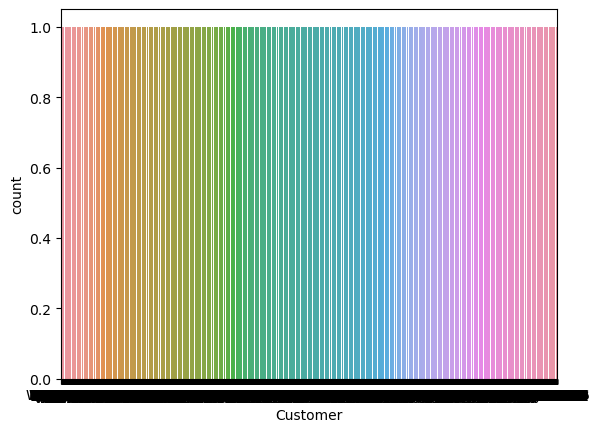

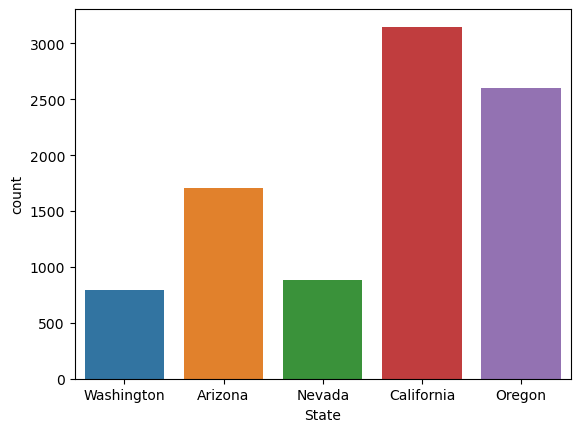

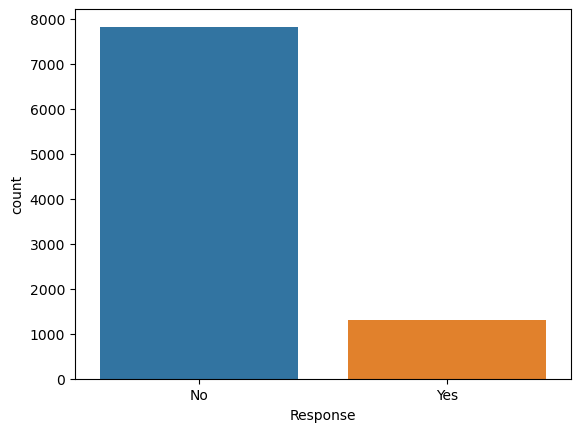

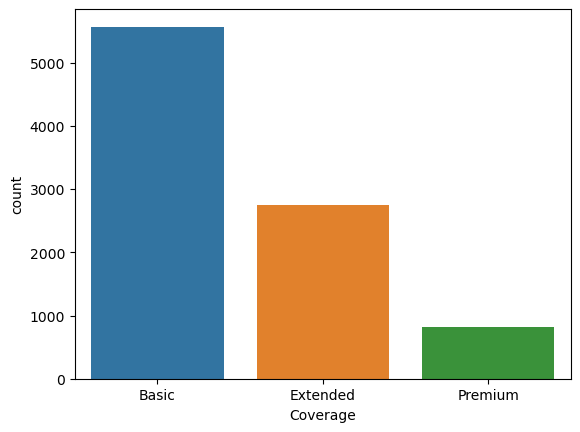

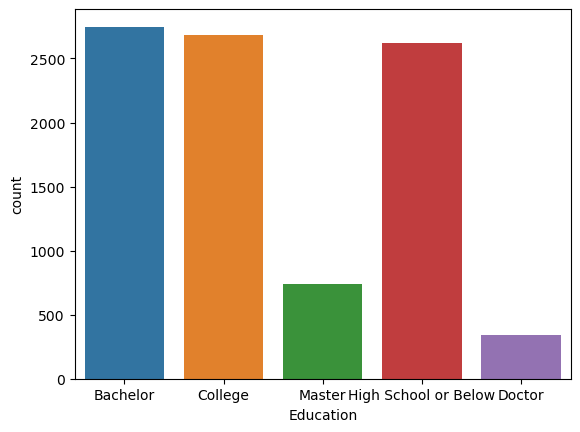

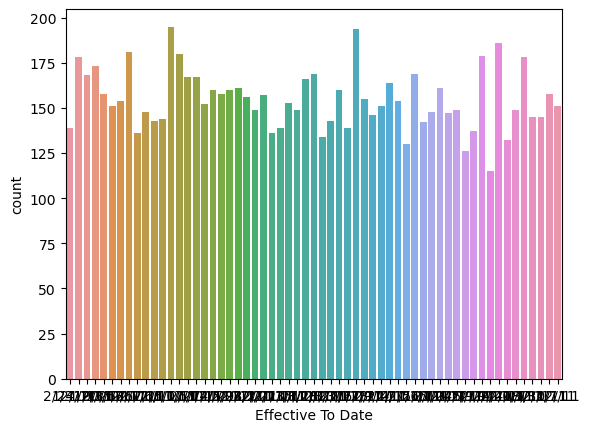

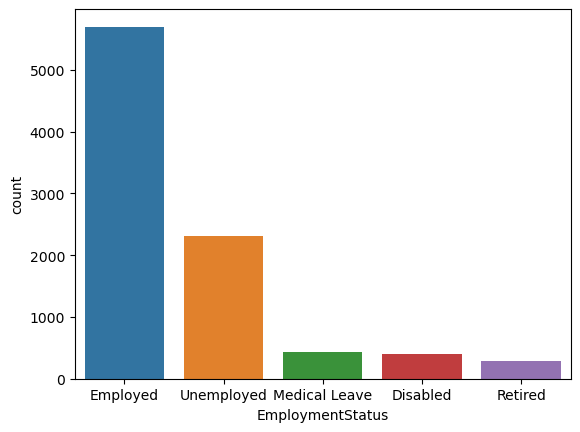

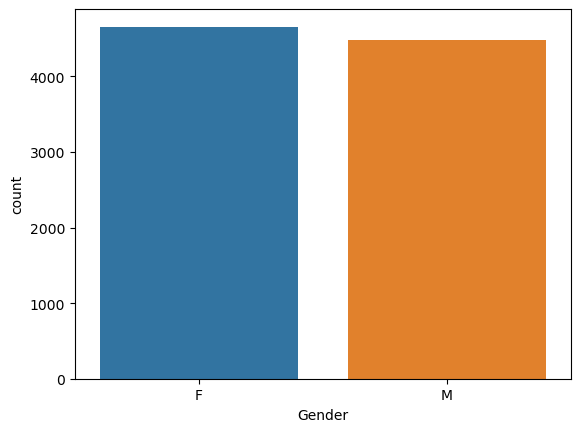

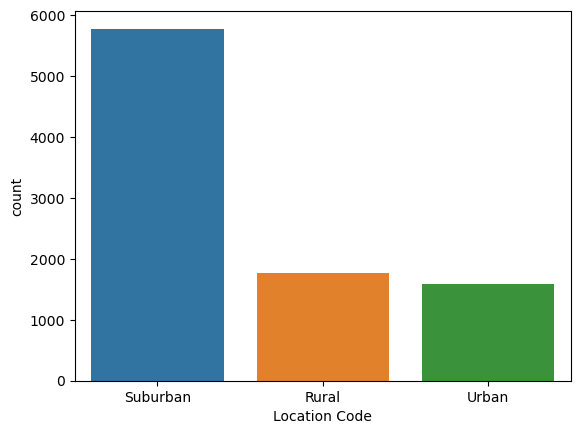

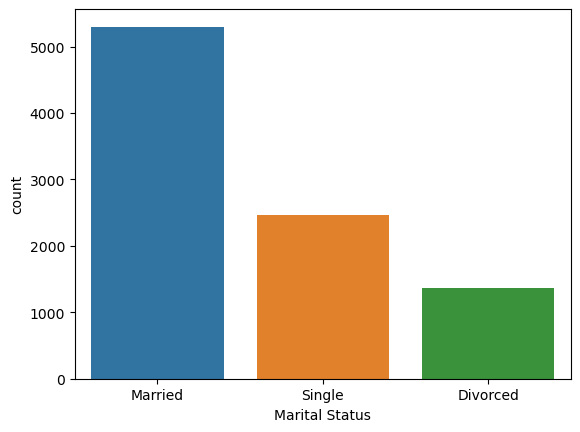

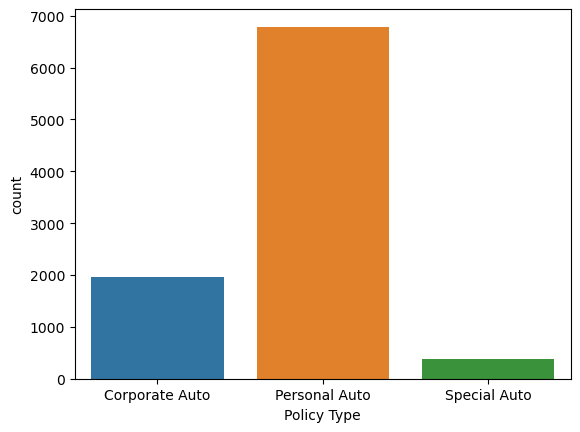

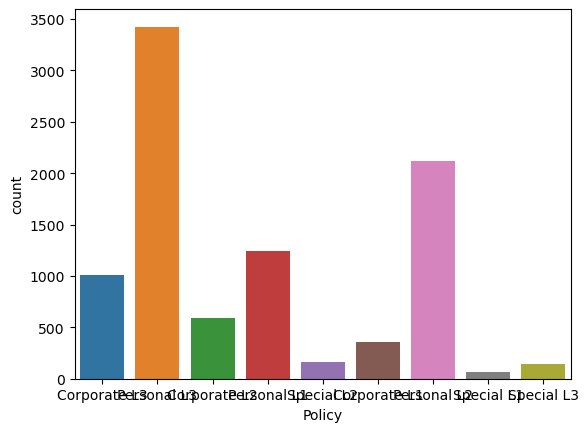

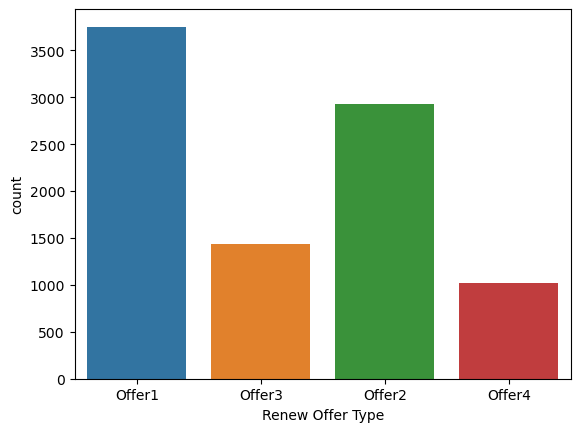

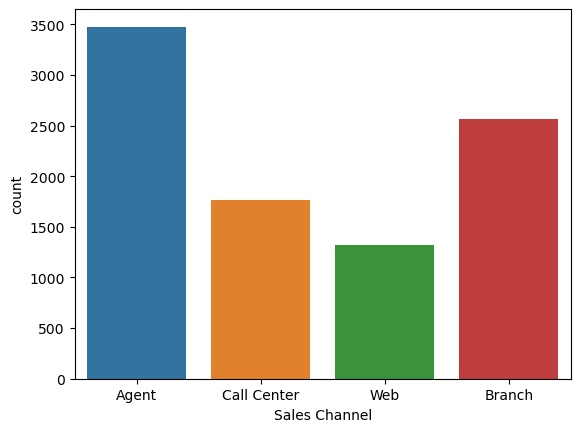

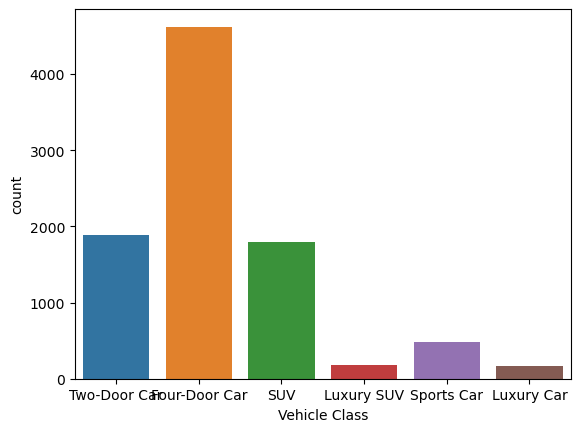

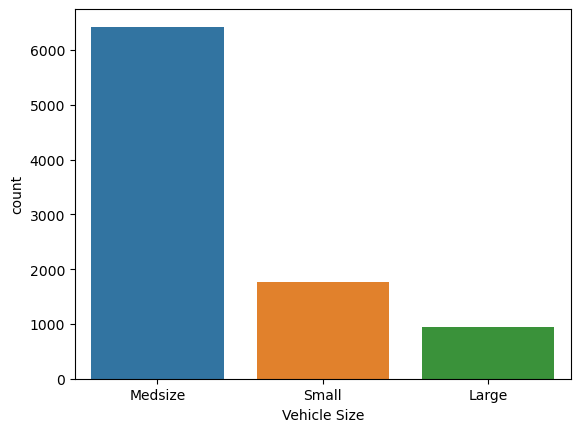

In [8]:
for col in categoricals.columns:
        sns.countplot(x = col, data = categoricals)
        plt.show()

No point doing it with Customer. Effective to date is unreadable. We should change the names of the values in Policy for a better readability. 

 - Plot time variable. Can you extract something from it?

In [9]:
import datetime

In [10]:
#We saw in 8 that Effective to date is unreadable so I'll try to separate it and then we'll be able to plot something clear
categoricals['Effective To Date']=pd.to_datetime(categoricals['Effective To Date'])
date = categoricals[["Effective To Date"]]
date['day'] = date['Effective To Date'].dt.strftime('%d')
date['day'] = pd.to_numeric(date['day'])
date['month'] = date['Effective To Date'].dt.strftime('%m')
date['month'] = pd.to_numeric(date['month'])
date['year'] = date['Effective To Date'].dt.strftime('%y')
date['year'] = pd.to_numeric(date['year'])
date = date[["day", "month", "year"]]
date

,day,month,year
0,24,2,11
1,31,1,11
2,19,2,11
3,20,1,11
4,3,2,11
...,...,...,...
9129,10,2,11
9130,12,2,11
9131,6,2,11
9132,3,2,11


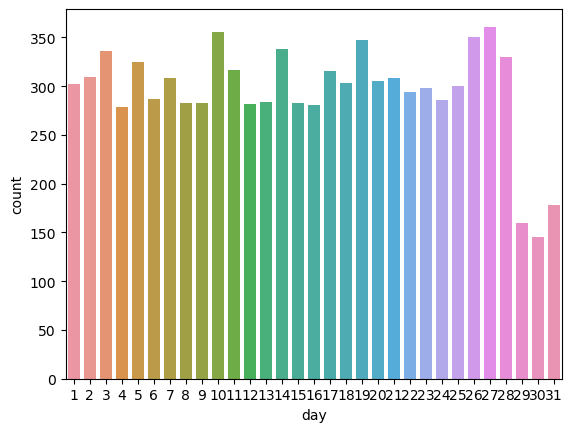

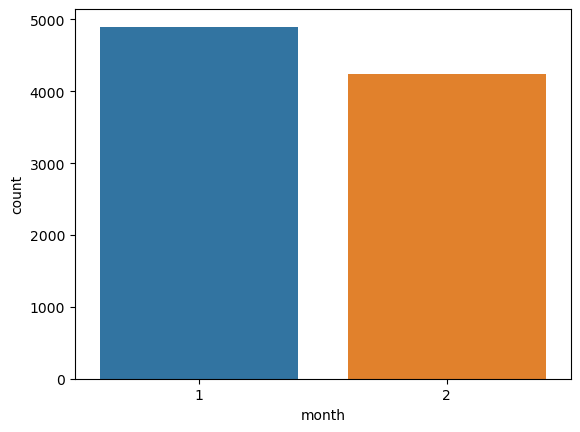

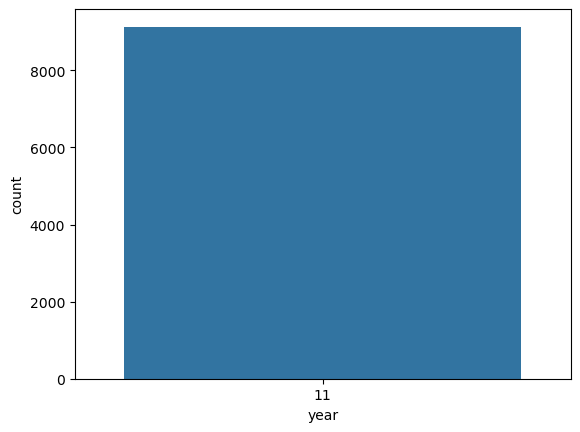

In [11]:
for col in date.columns:
        sns.countplot(x = col, data = date)
        plt.show()